In [1]:
!pip install transformers datasets sentencepiece accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl

In [2]:
from datasets import load_dataset
data = load_dataset("kde4", lang1="en", lang2="es")
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for kde4 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/kde4
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 218655
    })
})

In [3]:
subset = data["train"].shuffle(seed=42).select(range(1000))

In [4]:
split = subset.train_test_split(seed=42)

In [5]:
split["train"][0]

{'id': '74222',
 'translation': {'en': 'Mute command turns the sound on or off.',
  'es': 'La orden Silenciar activa o desactiva el sonido.'}}

In [6]:
from transformers import AutoTokenizer

In [7]:
checkpoint = "Helsinki-NLP/opus-mt-en-es"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [8]:
en = split["train"][5]["translation"]["en"]
es = split["train"][5]["translation"]["es"]
en, es

('& kicker;, the & kde; Panel', '& kicker; el panel de & kde;')

In [9]:
inputs = tokenizer(en)
inputs

{'input_ids': [738, 16477, 237, 51, 2, 5, 738, 51428, 51, 3893, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
targets = tokenizer(text_target=es)

In [11]:
targets

{'input_ids': [25, 1696, 25701, 9388, 51, 14, 4853, 4, 25, 1696, 3189, 299, 51, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [12]:
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁',
 '&',
 '▁ki',
 'cker',
 ';',
 '▁el',
 '▁panel',
 '▁de',
 '▁',
 '&',
 '▁k',
 'de',
 ';',
 '</s>']

In [13]:
# bad example
bad_targets = tokenizer(es)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁&', '▁kick', 'er', ';', '▁el', '▁panel', '▁de', '▁&', '▁kde', ';', '</s>']

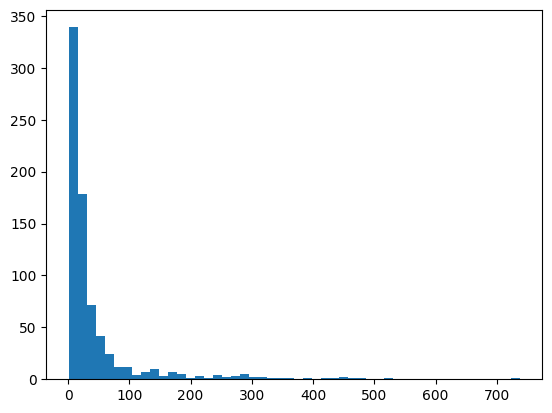

In [14]:
import matplotlib.pyplot as plt

train = split['train']['translation']
input_lens = [len(tr['en']) for tr in train]

plt.hist(input_lens, bins=50);

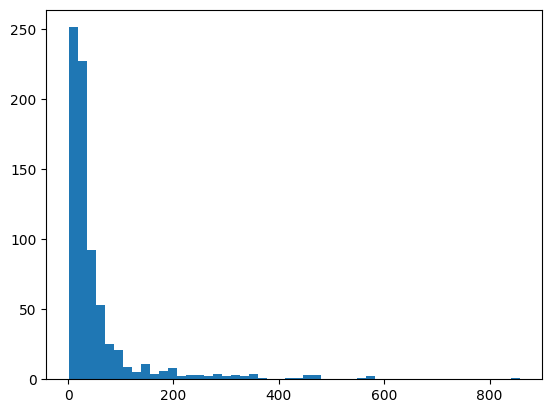

In [15]:
input_lens = [len(tr['es']) for tr in train]
plt.hist(input_lens, bins=50);

In [16]:
max_input_len = 128
max_target_len = 128

def tokenizer_fn(batch):
  inputs = [x['en'] for x in batch['translation']]
  targets = [x['es'] for x in batch['translation']]

  tokenized_inputs = tokenizer(inputs, max_length=max_input_len, truncation=True)
  tokenized_targets = tokenizer(text_target=targets, max_length=max_target_len, truncation=True)

  tokenized_inputs['labels'] = tokenized_targets['input_ids']
  return tokenized_inputs

In [17]:
tokenized_datasets = split.map(
    tokenizer_fn,
    batched=True,
    remove_columns=split['train'].column_names
)

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [18]:
from transformers import AutoModelForSeq2SeqLM

In [19]:
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [20]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [21]:
[tokenized_datasets["train"][i] for i in range(1, 3)]

[{'input_ids': [23292,
   5,
   1149,
   2316,
   8407,
   3,
   143,
   6745,
   31,
   211,
   627,
   174,
   5,
   46861,
   31,
   73,
   8,
   2316,
   8407,
   118,
   1103,
   3,
   0],
  'attention_mask': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1],
  'labels': [8002,
   514,
   14,
   37527,
   1029,
   3,
   539,
   21734,
   26,
   1607,
   2971,
   122,
   14,
   2134,
   91,
   108,
   12,
   38,
   2288,
   20488,
   3,
   0]},
 {'input_ids': [20747, 6319, 13, 3081, 0],
  'attention_mask': [1, 1, 1, 1, 1],
  'labels': [19115, 47, 5505, 14, 7683, 0]}]

In [22]:
batch = data_collator([tokenized_datasets["train"][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [23]:
batch["labels"]

tensor([[ 8002,   514,    14, 37527,  1029,     3,   539, 21734,    26,  1607,
          2971,   122,    14,  2134,    91,   108,    12,    38,  2288, 20488,
             3,     0],
        [19115,    47,  5505,    14,  7683,     0,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100]])

In [24]:
batch["decoder_input_ids"]

tensor([[65000,  8002,   514,    14, 37527,  1029,     3,   539, 21734,    26,
          1607,  2971,   122,    14,  2134,    91,   108,    12,    38,  2288,
         20488,     3],
        [65000, 19115,    47,  5505,    14,  7683,     0, 65000, 65000, 65000,
         65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000, 65000,
         65000, 65000]])

In [25]:
tokenizer.convert_ids_to_tokens(batch["decoder_input_ids"][0])

['<pad>',
 '▁Bor',
 'ra',
 '▁el',
 '▁marcador',
 '▁actual',
 '.',
 '▁Este',
 '▁comando',
 '▁se',
 '▁encuentra',
 '▁disponible',
 '▁si',
 '▁el',
 '▁curso',
 'r',
 '▁está',
 '▁en',
 '▁una',
 '▁ubicación',
 '▁marcada',
 '.']

In [26]:
tokenizer.convert_ids_to_tokens(batch["labels"][0])

['▁Bor',
 'ra',
 '▁el',
 '▁marcador',
 '▁actual',
 '.',
 '▁Este',
 '▁comando',
 '▁se',
 '▁encuentra',
 '▁disponible',
 '▁si',
 '▁el',
 '▁curso',
 'r',
 '▁está',
 '▁en',
 '▁una',
 '▁ubicación',
 '▁marcada',
 '.',
 '</s>']

In [27]:
split["train"][1]

{'id': '51813',
 'translation': {'en': 'Remove the current bookmark. This command is only available if the cursor is at a bookmarked location.',
  'es': 'Borra el marcador actual. Este comando se encuentra disponible si el cursor está en una ubicación marcada.'}}

In [28]:
!pip install sacrebleu bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.3 MB/s eta 0:00:00


In [29]:
from datasets import load_metric

In [30]:
bleu_metric = load_metric("sacrebleu")
bert_metric = load_metric("bertscore")

<ipython-input-30-3c3380a9526a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for bertscore contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/bertscore/bertscore.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [31]:
bleu_metric.compute(predictions=["I love cats"], references=[["I love cats"]])

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [32]:
s = "Marian is an efficient NMT framework written in pure C++"
bleu_metric.compute(predictions=[s], references=[[s]])

{'score': 100.00000000000004,
 'counts': [12, 11, 10, 9],
 'totals': [12, 11, 10, 9],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [33]:
bert_metric.compute(predictions=["I love cats"], references=[["I like cats"]], lang="en")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [0.9803369641304016],
 'recall': [0.9803369641304016],
 'f1': [0.9803369641304016],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.41.0)'}

In [34]:
import numpy as np

In [43]:
def compute_metrics(preds_and_labels):
  preds, labels = preds_and_labels
  decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

  labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
  decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  # get rif of unecessary white spaces
  decoded_preds = [pred.strip() for pred in decoded_preds]
  decoded_labels = [[label.strip()] for label in decoded_labels]

  bleu_score = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
  bert_score = bert_metric.compute(predictions=decoded_preds, references=decoded_labels, lang='es')

  return {
      "bleu": bleu_score["score"],
      "bert_score": np.mean(bert_score["f1"])
  }

In [45]:
from transformers import Seq2SeqTrainingArguments

In [46]:
training_args = Seq2SeqTrainingArguments(
    "finetuned-model",
    evaluation_strategy="no",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [47]:
from transformers import Seq2SeqTrainer

In [48]:
trainer = Seq2SeqTrainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [49]:
trainer.evaluate(max_length=max_target_len)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

{'eval_loss': 1.2128264904022217,
 'eval_bleu': 46.031124578746876,
 'eval_bert_score': 0.8932371525764465,
 'eval_runtime': 34.0145,
 'eval_samples_per_second': 7.35,
 'eval_steps_per_second': 0.118}

In [50]:
trainer.train()

Step,Training Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strate

TrainOutput(global_step=72, training_loss=1.160566012064616, metrics={'train_runtime': 32.5033, 'train_samples_per_second': 69.224, 'train_steps_per_second': 2.215, 'total_flos': 40953462128640.0, 'train_loss': 1.160566012064616, 'epoch': 3.0})

In [51]:
trainer.evaluate(max_length=max_target_len)

{'eval_loss': 1.0728286504745483,
 'eval_bleu': 44.5950582102165,
 'eval_bert_score': 0.8992044098377228,
 'eval_runtime': 25.2388,
 'eval_samples_per_second': 9.905,
 'eval_steps_per_second': 0.158,
 'epoch': 3.0}

In [52]:
trainer.save_model("my_saved_model")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


In [53]:
from transformers import pipeline
translator = pipeline("translation", model="my_saved_model", device=0)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [54]:
translator("Every day I stray further from god!")

[{'translation_text': '¡Cada día me alejo más de Dios!'}]